In [1]:
# prompt: import python data science libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# pip install catboost

In [3]:
stock_df = pd.read_csv('../archive/stock_df_2019_present.csv')
stock_df.head()

Date Ticker           Open           High            Low  \
0  2019-01-02    KRP       9.796298      10.451326       9.665293   
1  2019-01-02     AP       3.060000       4.090000       3.020000   
2  2019-01-02   VIRT      23.052477      23.537036      22.881983   
3  2019-01-02   UUUU       2.730000       2.850000       2.710000   
4  2019-01-02   CENN  132000.000000  134250.000000  126150.000000   

           Close    Volume  Dividends  Stock Splits      CIK  \
0      10.189315   92800.0        0.0           0.0  1657788   
1       4.060000  164400.0        0.0           0.0     6176   
2      23.321676  801200.0        0.0           0.0  1592386   
3       2.780000  755600.0        0.0           0.0  1385849   
4  126300.000000       0.0        0.0           0.0  1707919   

                   Company Name countryma stprma      cityba  zipba  \
0  Kimbell Royalty Partners, LP        US     TX  FORT WORTH  76102   
1         AMPCO PITTSBURGH CORP        US     PA    CARNEGIE  15106   
2         Virtu Financial, Inc.        US     NY    NEW YORK  10019   
3              ENERGY FUELS INC        US     CO    LAKEWOOD  80228   
4                  Cenntro Inc.        US     NJ    FREEHOLD   7728   

                     address1  SIC Code                             Office  \
0   777 TAYLOR ST., SUITE 810      1311  Office of Energy & Transportation   
1             726 BELL AVENUE      3561               Office of Technology   
2               1633 BROADWAY      6211                  Office of Finance   
3  225 UNION BLVD., SUITE 600      1400  Office of Energy & Transportation   
4            501 OKERSON ROAD      3711            Office of Manufacturing   

                                      Industry Title  
0                      CRUDE PETROLEUM & NATURAL GAS  
1                          PUMPS & PUMPING EQUIPMENT  
2    SECURITY BROKERS, DEALERS & FLOTATION COMPANIES  
3  MINING & QUARRYING OF NONMETALLIC MINERALS (NO...  
4              MOTOR VEHICLES & PASSENGER CAR BODIES

In [4]:
stock_df.describe().T

count          mean           std          min        25%  \
Open          8219716.0  2.902275e+03  2.427186e+05  -157.453068       6.18   
High          8219716.0  3.109502e+03  2.654104e+05  -157.453068       6.37   
Low           8219716.0  2.672840e+03  2.179950e+05  -157.453049       6.00   
Close         8219719.0  2.885309e+03  2.421209e+05  -157.453049       6.17   
Volume        8219731.0  1.390424e+06  1.113887e+07     0.000000    9600.00   
Dividends     8219731.0  1.207783e-03  7.713095e-02     0.000000       0.00   
Stock Splits  8219731.0  5.862528e-05  3.732260e-02     0.000000       0.00   
CIK           8219731.0  1.191209e+06  5.258628e+05  1750.000000  893847.00   
SIC Code      8219731.0  4.857812e+03  1.973667e+03   100.000000    2890.00   

                       50%           75%           max  
Open          1.917000e+01  4.546000e+01  8.461538e+07  
High          1.950000e+01  4.626000e+01  1.153846e+08  
Low           1.881000e+01  4.464000e+01  5.627692e+07  
Close         1.915000e+01  4.544491e+01  8.461538e+07  
Volume        1.213000e+05  6.915000e+05  2.511528e+09  
Dividends     0.000000e+00  0.000000e+00  8.000000e+01  
Stock Splits  0.000000e+00  0.000000e+00  1.000000e+02  
CIK           1.321828e+06  1.610618e+06  1.953530e+06  
SIC Code      4.924000e+03  6.500000e+03  8.900000e+03

In [5]:
len(stock_df['Company Name'].unique())

5456

In [6]:
len(stock_df['Ticker'].unique())

6482

In [7]:
stock_df['Ticker'].value_counts()

Ticker
KRP      1471
SBSI     1471
LPX      1471
AMG      1471
ZLAB     1471
         ... 
TCENF       9
TRIC        1
TRLI        1
SHCRW       1
GRAMW       1
Name: count, Length: 6482, dtype: int64

In [8]:
stock_df['Company Name'].value_counts()

Company Name
FEDERAL HOME LOAN MORTGAGE CORP                     36753
ProShares Trust II                                  23536
FEDERAL NATIONAL MORTGAGE ASSOCIATION FANNIE MAE    23014
BANK OF AMERICA CORP /DE/                           20790
Public Storage                                      16961
                                                    ...  
VIVIC CORP.                                            34
LAMY                                                   24
Carriage House Event Center, Inc.                      12
Enviva Inc.                                             9
Strategic Student & Senior Housing Trust, Inc.          9
Name: count, Length: 5456, dtype: int64

In [9]:
len(stock_df[stock_df['Company Name'] == 'FEDERAL HOME LOAN MORTGAGE CORP'])

36753

In [10]:
stock_df[stock_df['Company Name'] == 'FEDERAL HOME LOAN MORTGAGE CORP']['Ticker'].unique()

array(['FMCKJ', 'FREJP', 'FMCCI', 'FMCCP', 'FMCKP', 'FMCKI', 'FMCKM',
       'FMCCH', 'FMCCG', 'FMCCS', 'FREJN', 'FMCCN', 'FMCCL', 'FMCKK',
       'FMCKL', 'FREJO', 'FREGP', 'FMCCT', 'FMCCO', 'FMCCK', 'FMCCJ',
       'FMCKO', 'FMCKN', 'FMCC', 'FMCCM'], dtype=object)

In [11]:
stock_df.isna().sum()

Date                   0
Ticker                 0
Open                  15
High                  15
Low                   15
Close                 12
Volume                 0
Dividends              0
Stock Splits           0
CIK                    0
Company Name           0
countryma          28980
stprma            842134
cityba             13118
zipba              11647
address1           11647
SIC Code               0
Office                 0
Industry Title         0
dtype: int64

In [12]:
len(stock_df['Industry Title'].unique())

395

In [13]:
stock_df['Industry Title'].value_counts().head(10)

Industry Title
PHARMACEUTICAL PREPARATIONS                        752044
REAL ESTATE INVESTMENT TRUSTS                      459629
STATE COMMERCIAL BANKS                             323449
SERVICES-PREPACKAGED SOFTWARE                      284357
NATIONAL COMMERCIAL BANKS                          222293
BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)    221640
BLANK CHECKS                                       191730
SURGICAL & MEDICAL INSTRUMENTS & APPARATUS         189568
SERVICES-BUSINESS SERVICES, NEC                    151038
CRUDE PETROLEUM & NATURAL GAS                      142547
Name: count, dtype: int64

In [14]:
stock_df.head()

Date Ticker           Open           High            Low  \
0  2019-01-02    KRP       9.796298      10.451326       9.665293   
1  2019-01-02     AP       3.060000       4.090000       3.020000   
2  2019-01-02   VIRT      23.052477      23.537036      22.881983   
3  2019-01-02   UUUU       2.730000       2.850000       2.710000   
4  2019-01-02   CENN  132000.000000  134250.000000  126150.000000   

           Close    Volume  Dividends  Stock Splits      CIK  \
0      10.189315   92800.0        0.0           0.0  1657788   
1       4.060000  164400.0        0.0           0.0     6176   
2      23.321676  801200.0        0.0           0.0  1592386   
3       2.780000  755600.0        0.0           0.0  1385849   
4  126300.000000       0.0        0.0           0.0  1707919   

                   Company Name countryma stprma      cityba  zipba  \
0  Kimbell Royalty Partners, LP        US     TX  FORT WORTH  76102   
1         AMPCO PITTSBURGH CORP        US     PA    CARNEGIE  15106   
2         Virtu Financial, Inc.        US     NY    NEW YORK  10019   
3              ENERGY FUELS INC        US     CO    LAKEWOOD  80228   
4                  Cenntro Inc.        US     NJ    FREEHOLD   7728   

                     address1  SIC Code                             Office  \
0   777 TAYLOR ST., SUITE 810      1311  Office of Energy & Transportation   
1             726 BELL AVENUE      3561               Office of Technology   
2               1633 BROADWAY      6211                  Office of Finance   
3  225 UNION BLVD., SUITE 600      1400  Office of Energy & Transportation   
4            501 OKERSON ROAD      3711            Office of Manufacturing   

                                      Industry Title  
0                      CRUDE PETROLEUM & NATURAL GAS  
1                          PUMPS & PUMPING EQUIPMENT  
2    SECURITY BROKERS, DEALERS & FLOTATION COMPANIES  
3  MINING & QUARRYING OF NONMETALLIC MINERALS (NO...  
4              MOTOR VEHICLES & PASSENGER CAR BODIES

In [15]:
stock_df['Price Change'] = stock_df['Close'] - stock_df['Open']
stock_df['Volatility'] = stock_df['High'] - stock_df['Low']

In [16]:
stock_df.head()

Date Ticker           Open           High            Low  \
0  2019-01-02    KRP       9.796298      10.451326       9.665293   
1  2019-01-02     AP       3.060000       4.090000       3.020000   
2  2019-01-02   VIRT      23.052477      23.537036      22.881983   
3  2019-01-02   UUUU       2.730000       2.850000       2.710000   
4  2019-01-02   CENN  132000.000000  134250.000000  126150.000000   

           Close    Volume  Dividends  Stock Splits      CIK  ... countryma  \
0      10.189315   92800.0        0.0           0.0  1657788  ...        US   
1       4.060000  164400.0        0.0           0.0     6176  ...        US   
2      23.321676  801200.0        0.0           0.0  1592386  ...        US   
3       2.780000  755600.0        0.0           0.0  1385849  ...        US   
4  126300.000000       0.0        0.0           0.0  1707919  ...        US   

  stprma      cityba  zipba                    address1 SIC Code  \
0     TX  FORT WORTH  76102   777 TAYLOR ST., SUITE 810     1311   
1     PA    CARNEGIE  15106             726 BELL AVENUE     3561   
2     NY    NEW YORK  10019               1633 BROADWAY     6211   
3     CO    LAKEWOOD  80228  225 UNION BLVD., SUITE 600     1400   
4     NJ    FREEHOLD   7728            501 OKERSON ROAD     3711   

                              Office  \
0  Office of Energy & Transportation   
1               Office of Technology   
2                  Office of Finance   
3  Office of Energy & Transportation   
4            Office of Manufacturing   

                                      Industry Title Price Change   Volatility  
0                      CRUDE PETROLEUM & NATURAL GAS     0.393016     0.786033  
1                          PUMPS & PUMPING EQUIPMENT     1.000000     1.070000  
2    SECURITY BROKERS, DEALERS & FLOTATION COMPANIES     0.269199     0.655052  
3  MINING & QUARRYING OF NONMETALLIC MINERALS (NO...     0.050000     0.140000  
4              MOTOR VEHICLES & PASSENGER CAR BODIES -5700.000000  8100.000000  

[5 rows x 21 columns]

In [17]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

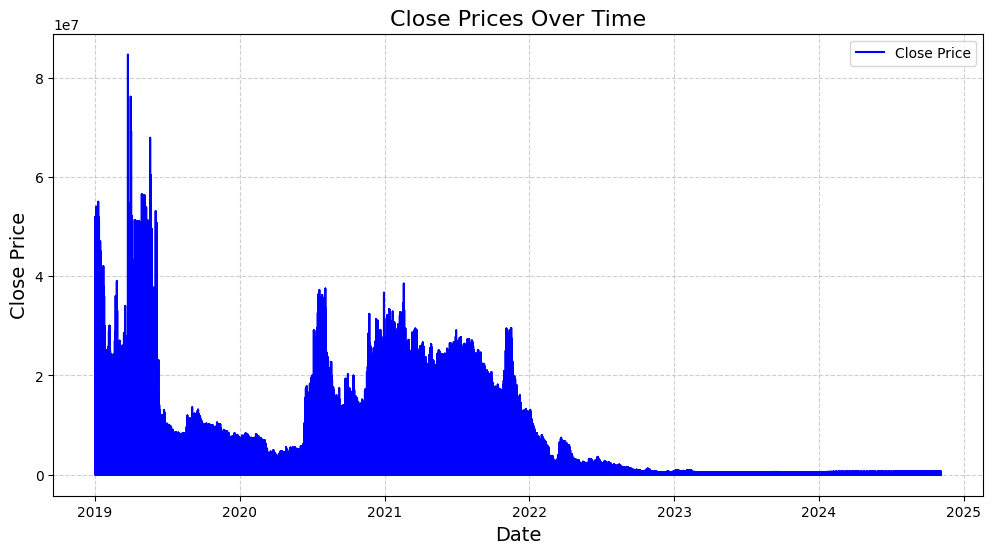

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(stock_df['Date'], stock_df['Close'], label='Close Price', color='blue')
plt.title('Close Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

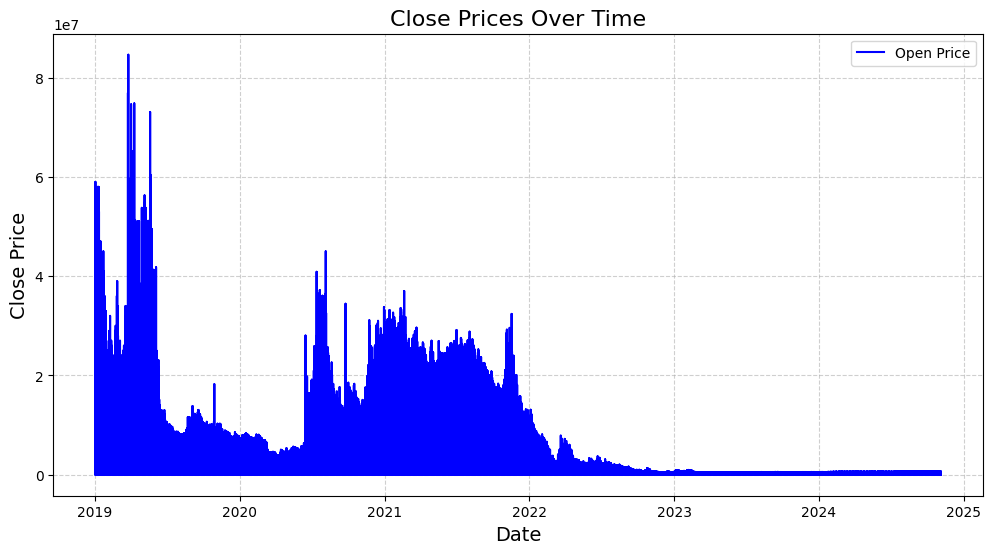

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(stock_df['Date'], stock_df['Open'], label='Open Price', color='blue')
plt.title('Close Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [20]:
stock_df = stock_df.sort_values('Date')

In [21]:
stock_df.set_index('Date', inplace=True)

close_prices = stock_df['Close']

In [22]:
stock_df.isna().sum()

Ticker                 0
Open                  15
High                  15
Low                   15
Close                 12
Volume                 0
Dividends              0
Stock Splits           0
CIK                    0
Company Name           0
countryma          28980
stprma            842134
cityba             13118
zipba              11647
address1           11647
SIC Code               0
Office                 0
Industry Title         0
Price Change          15
Volatility            15
dtype: int64

In [23]:
stock_df_numerical = stock_df[['Open', 'Ticker', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Price Change', 'Volatility']]

In [24]:
stock_df_numerical = stock_df_numerical.dropna()

In [25]:
stock_df_numerical.isna().sum()

Open            0
Ticker          0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Price Change    0
Volatility      0
dtype: int64

In [26]:
stock_df_numerical.head()

Open Ticker        High         Low       Close     Volume  \
Date                                                                           
2019-01-02    9.796298    KRP   10.451326    9.665293   10.189315    92800.0   
2019-01-02    0.400000   BMNR    0.400000    0.400000    0.400000        0.0   
2019-01-02  143.655813   CBRL  147.306689  143.216615  147.023026   740000.0   
2019-01-02   20.180000  LBTYK   20.910000   20.030001   20.700001  4928200.0   
2019-01-02  141.860001   CACI  144.529999  140.639999  141.929993   344100.0   

            Dividends  Stock Splits  Price Change  Volatility  
Date                                                           
2019-01-02        0.0           0.0      0.393016    0.786033  
2019-01-02        0.0           0.0      0.000000    0.000000  
2019-01-02        0.0           0.0      3.367212    4.090074  
2019-01-02        0.0           0.0      0.520000    0.879999  
2019-01-02        0.0           0.0      0.069992    3.889999

In [27]:
# Create a target column (next day's closing price) for each stock
stock_df_numerical['Close_next_day'] = stock_df_numerical.groupby('Ticker')['Close'].shift(-1)

# Drop rows with missing target values
stock_df_numerical = stock_df_numerical.dropna(subset=['Close_next_day'])

In [28]:
stock_df_numerical.head(10)

Open Ticker        High         Low       Close     Volume  \
Date                                                                           
2019-01-02    9.796298    KRP   10.451326    9.665293   10.189315    92800.0   
2019-01-02    0.400000   BMNR    0.400000    0.400000    0.400000        0.0   
2019-01-02  143.655813   CBRL  147.306689  143.216615  147.023026   740000.0   
2019-01-02   20.180000  LBTYK   20.910000   20.030001   20.700001  4928200.0   
2019-01-02  141.860001   CACI  144.529999  140.639999  141.929993   344100.0   
2019-01-02   10.500000  FMCCO   10.500000   10.500000   10.500000      700.0   
2019-01-02    6.077185    RYI    6.700740    5.988106    6.591866   116200.0   
2019-01-02   18.493242   LMNR   19.076837   18.215797   18.933331    52600.0   
2019-01-02   21.000093    DDT   21.048780   20.935177   20.951406    24100.0   
2019-01-02    2.300000   QRON    2.300000    2.300000    2.300000        0.0   

            Dividends  Stock Splits  Price Change  Volatility  Close_next_day  
Date                                                                           
2019-01-02        0.0           0.0      0.393016    0.786033        9.687128  
2019-01-02        0.0           0.0      0.000000    0.000000        0.400000  
2019-01-02        0.0           0.0      3.367212    4.090074      147.690979  
2019-01-02        0.0           0.0      0.520000    0.879999       20.570000  
2019-01-02        0.0           0.0      0.069992    3.889999      140.809998  
2019-01-02        0.0           0.0      0.000000    0.000000       10.650000  
2019-01-02        0.0           0.0      0.514680    0.712634        6.225651  
2019-01-02        0.0           0.0      0.440088    0.861040       18.378437  
2019-01-02        0.0           0.0     -0.048686    0.113603       20.854036  
2019-01-02        0.0           0.0      0.000000    0.000000        1.600000

## Catboost

In [56]:
# Select your features and target
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'Price Change', 'Volatility', 'Ticker']
target = 'Close_next_day'

# Separate the data into features (X) and target (y)
X = stock_df_numerical[features]
y = stock_df_numerical[target]

In [57]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [58]:
categorical_features = [X.columns.get_loc('Ticker')]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=33)

In [40]:
model = CatBoostRegressor(iterations=500,
                          learning_rate=0.1,
                          depth=6,
                          cat_features=categorical_features,
                          verbose=0)  # Suppress verbose output

In [41]:
model.fit(X_train, y_train)

In [61]:
y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = root_mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

print(f'mean squared error: {mse}')
print(f'root mean squared error: {rmse}')
print(f'r2 square: {r2}')

mean squared error: 706412793.4417351
root mean squared error: 26578.42721911391
r2 square: -10.77992308810123


In [44]:
# Save the model to a file
model.save_model('trained_models/catboost_model.cbm')

## Linear Regression

In [66]:
# Select your features and target
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'Price Change', 'Volatility']
target = 'Close_next_day'

# Separate the data into features (X) and target (y)
X = stock_df_numerical[features]
y = stock_df_numerical[target]

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=33)

In [69]:
linearReg = LinearRegression()

In [70]:
linearReg.fit(X_train, y_train)

LinearRegression()

In [71]:
y_preds = linearReg.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = root_mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

print(f'mean squared error: {mse}')
print(f'root mean squared error: {rmse}')
print(f'r2 square: {r2}')

mean squared error: 19335.4537466983
root mean squared error: 139.05198217464684
r2 square: 0.9996775679034635


In [74]:
import joblib 

# Save the model to a file
joblib.dump(linearReg, 'trained_models/linear_regression_model.joblib')

['trained_models/linear_regression_model.joblib']

## Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rfmodel = RandomForestRegressor(n_estimators=50,
    max_depth=20,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42)

In [77]:
rfmodel.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=50, random_state=42)

In [78]:
y_preds = rfmodel.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = root_mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

print(f'mean squared error: {mse}')
print(f'root mean squared error: {rmse}')
print(f'r2_score: {r2}')

mean squared error: 2732246.492851366
root mean squared error: 1652.9508440517418
r2_score: 0.9544378954595221


In [79]:
# Save the model to a file
joblib.dump(rfmodel, 'trained_models/random_forest_model.joblib')

['trained_models/random_forest_model.joblib']

In [87]:
X_test[1:2]

Open  High   Low   Volume  Dividends  Stock Splits  Price Change  \
Date                                                                           
2023-10-26  2.16  2.59  2.11  35600.0        0.0           0.0          0.25   

            Volatility  
Date                    
2023-10-26        0.48

In [88]:
y_test[1: 2]

Date
2023-10-26    2.43
Name: Close_next_day, dtype: float64